In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Data Extraction

In [167]:
vacancies = pd.read_csv("../vacancies.csv")
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             223 non-null    object 
 1   company           223 non-null    object 
 2   salary            87 non-null     object 
 3   english_level     204 non-null    object 
 4   experience_year   223 non-null    int64  
 5   domen             141 non-null    object 
 6   work_type         223 non-null    object 
 7   company_type      223 non-null    object 
 8   test_available    37 non-null     float64
 9   views             223 non-null    int64  
 10  applications      223 non-null    int64  
 11  publication_date  223 non-null    object 
 12  technologies      222 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 22.8+ KB


# Analytics of demand for levels of English

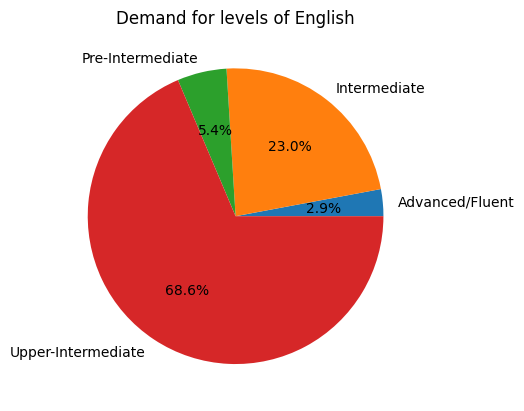

In [168]:
english_level = vacancies.groupby("english_level")["title"].count()

plt.pie(
    english_level.values,
    labels=english_level.index,
    autopct="%1.1f%%",
)
plt.title("Demand for levels of English")
plt.show()

# Analytics of demand for experience years

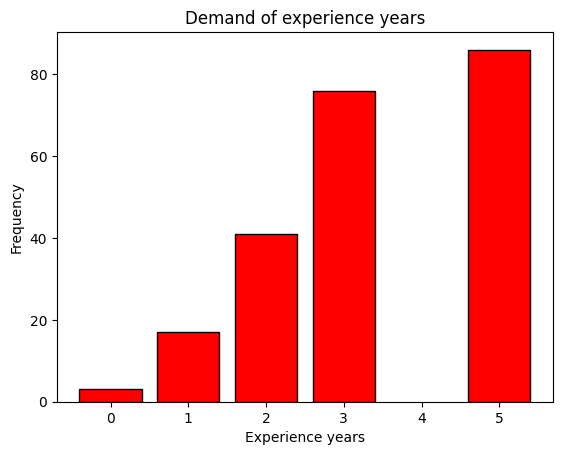

In [169]:
experience = vacancies.groupby("experience_year")["title"].count()

plt.bar(
    experience.index,
    experience.values,
    color="red",
    edgecolor="black",
)
plt.title("Demand of experience years")
plt.xlabel("Experience years")
plt.ylabel("Frequency")
plt.xticks(range(len(experience.index) + 1))
plt.show()

# Prepare for Technology Analytics

In [170]:
def plot_top_technologies(data: pd.DataFrame, title: str):
    plt.figure(figsize=(10, 6))
    data.plot(kind="bar", color="green")
    plt.title(title)
    plt.xlabel("Technologies")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


def get_top_technologies_by_experience(
    df: pd.DataFrame, min_exp_years: int, max_exp_years: int, title: str
):
    technologies_exp = (
        df[
            (df["experience_year"] >= min_exp_years)
            & (df["experience_year"] < max_exp_years)
        ]["technologies"]
        .str.split(",")
        .explode()
        .value_counts()
    )
    top_technologies_exp = technologies_exp.head(30)
    plot_top_technologies(top_technologies_exp, title)

# Analytics for most mentioned technologies

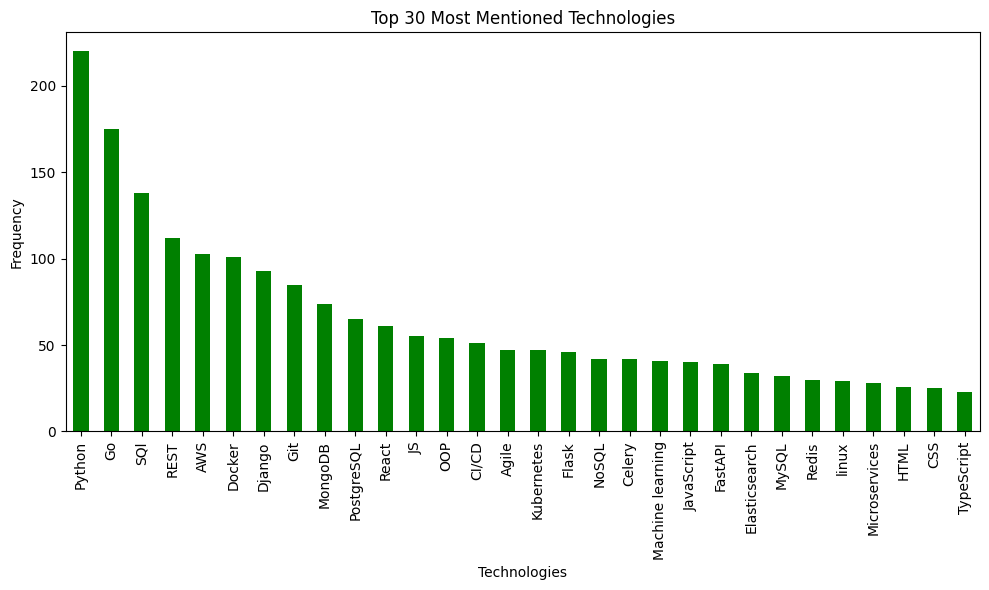

In [171]:
all_technologies = (
    vacancies["technologies"].str.split(",").explode().value_counts()
)

top_technologies = all_technologies.head(30)

plot_top_technologies(top_technologies, "Top 30 Most Mentioned Technologies")

# Analytics for most mentioned technologies for junior

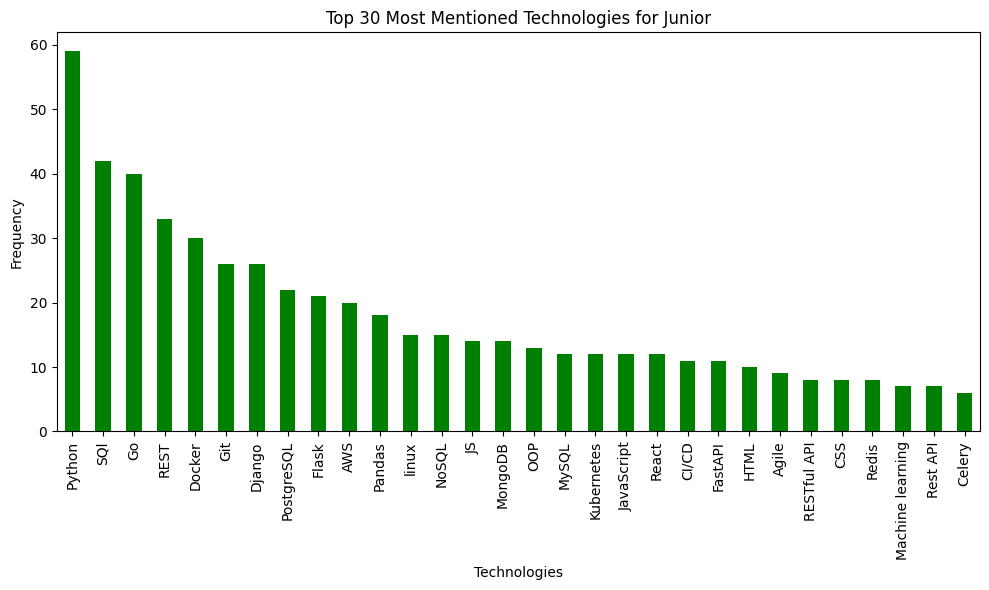

In [172]:
get_top_technologies_by_experience(
    vacancies, 0, 3, "Top 30 Most Mentioned Technologies for Junior"
)

# Analytics for most mentioned technologies for middle developer

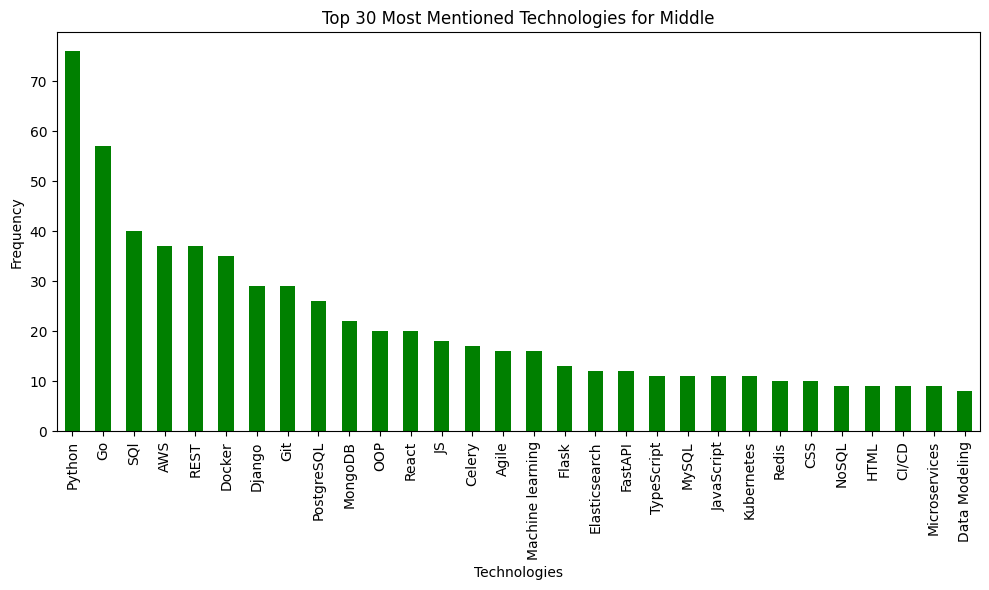

In [173]:
get_top_technologies_by_experience(
    vacancies, 3, 5, "Top 30 Most Mentioned Technologies for Middle"
)

# Analytics for most mentioned technologies for Senior

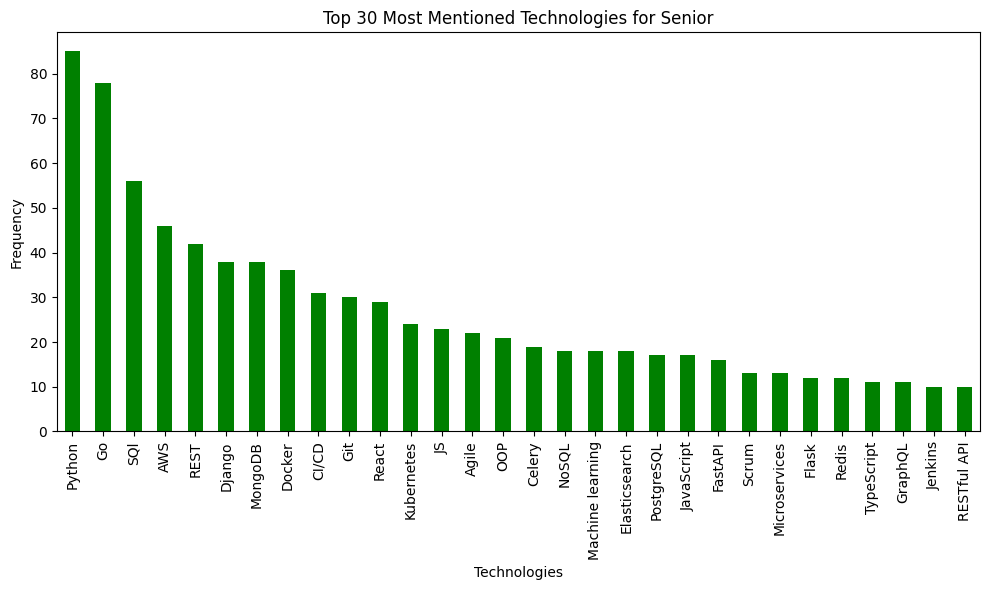

In [174]:
get_top_technologies_by_experience(
    vacancies, 5, float("inf"), "Top 30 Most Mentioned Technologies for Senior"
)

# Data wrangling for salary

In [175]:
vacancies[["min_salary", "max_salary"]] = vacancies["salary"].str.extract(
    r"\$(\d+)-(\d+)"
)

vacancies[["min_salary", "max_salary"]] = vacancies[
    ["min_salary", "max_salary"]
].astype(float)

vacancies["avg_salary"] = vacancies[["min_salary", "max_salary"]].mean(axis=1)

vacancies[["salary", "min_salary", "max_salary", "avg_salary"]]

,salary,min_salary,max_salary,avg_salary
0,NaN,NaN,NaN,NaN
1,$4000-5000,4000.0,5000.0,4500.0
2,$2000-3500,2000.0,3500.0,2750.0
3,$3000-5000,3000.0,5000.0,4000.0
4,NaN,NaN,NaN,NaN
...,...,...,...,...
218,NaN,NaN,NaN,NaN
219,$4000-7000,4000.0,7000.0,5500.0
220,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN


# Visualization of the dependence of salary on work experience

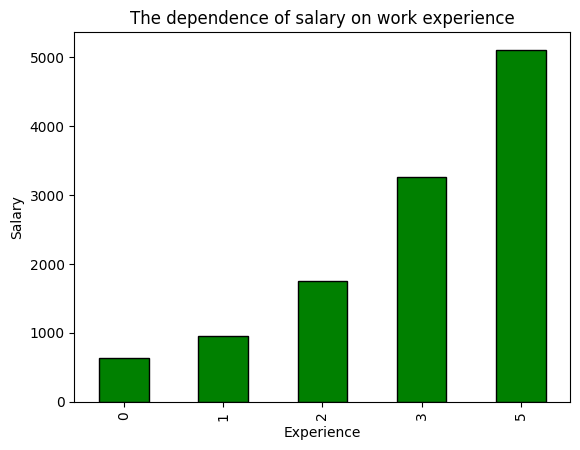

In [176]:
experience_salary = vacancies.groupby("experience_year")["avg_salary"].mean()

experience_salary.plot.bar(
    xlabel="Experience",
    ylabel="Salary",
    color="green",
    edgecolor="black",
    title="The dependence of salary on work experience",
)
plt.show()

# Visualization of the dependence of applications on the average salary

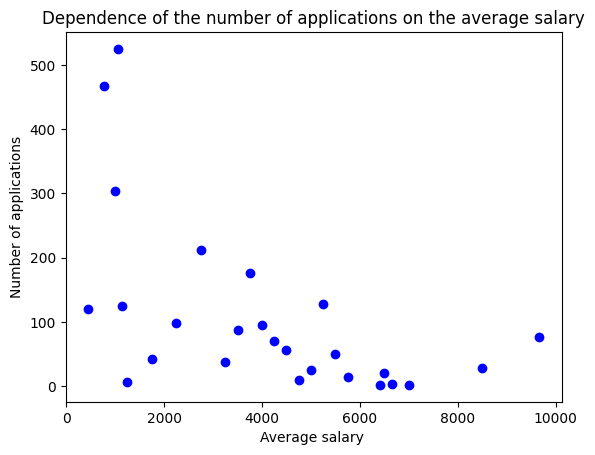

In [177]:
applications_salary = vacancies.groupby("avg_salary")["applications"].sum()

plt.scatter(
    applications_salary.index, applications_salary.values, color="blue"
)
plt.title("Dependence of the number of applications on the average salary")
plt.xlabel("Average salary ")
plt.ylabel("Number of applications")
plt.show()

# Visualization of the dependence of views on the company

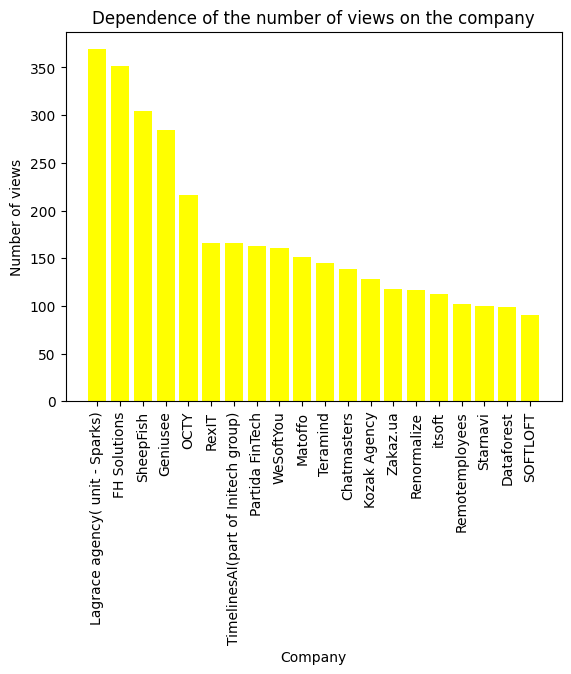

In [178]:
company_views = vacancies.groupby("company")["views"].sum()
company_views = company_views.sort_values(ascending=False)[:20]

plt.bar(company_views.index, company_views.values, color="yellow")
plt.title("Dependence of the number of views on the company")
plt.xlabel("Company")
plt.ylabel("Number of views")
plt.xticks(rotation=90)
plt.show()

# Visualization of the dependence of applications on the work type

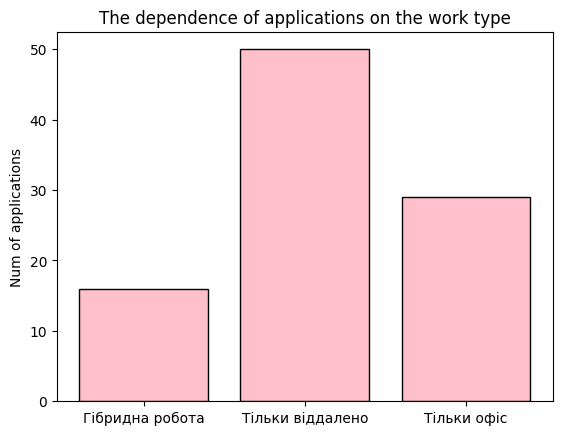

In [179]:
vacancies_copy = vacancies.copy()
worktype_mapping = {"Office або Remote": "Гібридна робота"}
vacancies_copy["work_type"] = vacancies_copy["work_type"].replace(
    worktype_mapping
)

grouped = vacancies_copy.groupby("work_type", as_index=False)
equal_vacancies = grouped.apply(lambda x: x.head(3))

applications_worktype = equal_vacancies.groupby("work_type")[
    "applications"
].sum()

plt.bar(
    applications_worktype.index,
    applications_worktype.values,
    color="pink",
    edgecolor="black",
)
plt.title("The dependence of applications on the work type")
plt.ylabel("Num of applications")
plt.show()

# Number of applications per day depending on experience years

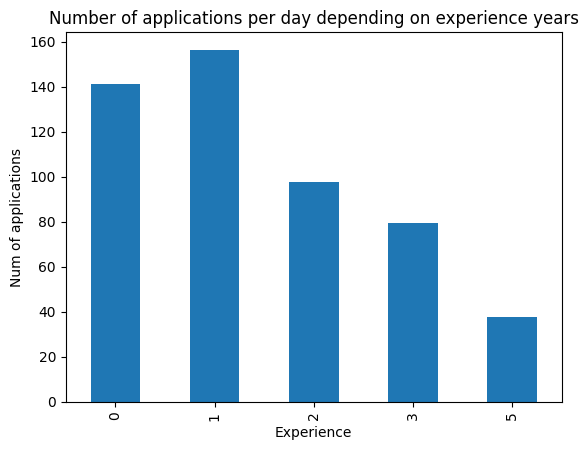

In [180]:
grouped_by_experience = vacancies.groupby("experience_year")
applications_sum = grouped_by_experience["applications"].sum()
unique_dates = grouped_by_experience["publication_date"].nunique()
avg_applications_per_day = applications_sum / unique_dates


avg_applications_per_day.plot.bar(
    xlabel="Experience",
    ylabel="Num of applications",
    title="Number of applications per day depending on experience years",
)
plt.show()

# Top 10 paying locations for Junior python developer

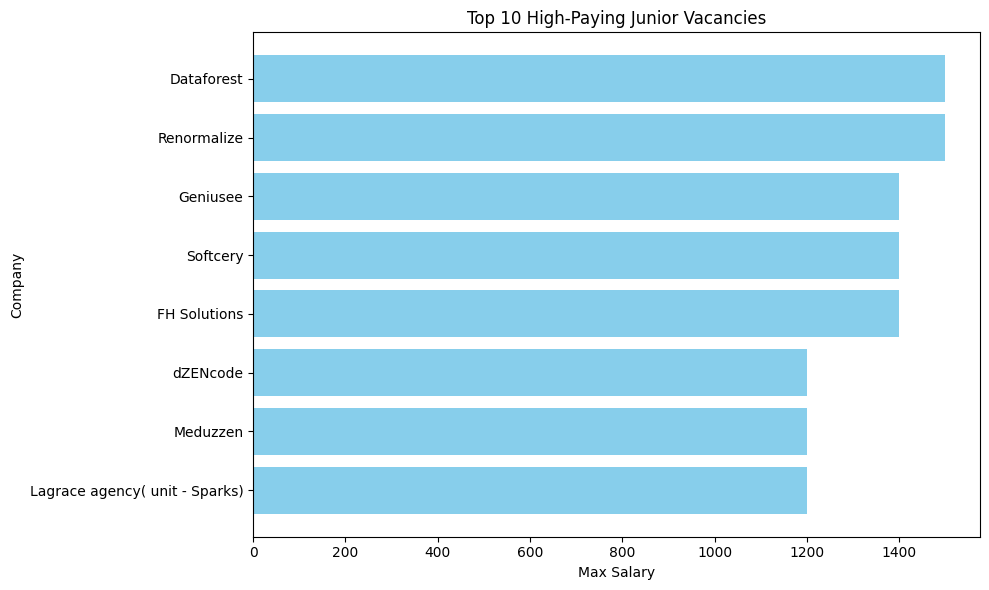

In [190]:
junior_vacancies = vacancies[vacancies["experience_year"] == 1]

junior_top_salaries = junior_vacancies.sort_values(
    by="max_salary", ascending=False
).head(10)[["company", "max_salary"]]


plt.figure(figsize=(10, 6))
plt.barh(
    junior_top_salaries["company"],
    junior_top_salaries["max_salary"],
    color="skyblue",
)
plt.xlabel("Max Salary")
plt.ylabel("Company")
plt.title("Top 10 High-Paying Junior Vacancies")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()